mnist의 데이터 개수가 6만으로 가장 많고
cifar10의 데이터 개수가 5만으로 가장 적기 때문에 정확도가

mnist > fmnist > cifar10 순이다.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [ ]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [ ]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

170500096/170498071 [==============================] - 4s 0us/step
X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [ ]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display images in CIFAR-10
- one random image
- 10 representative images

31794


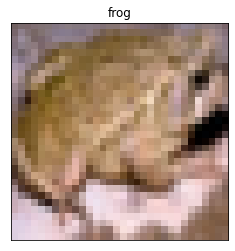

In [ ]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

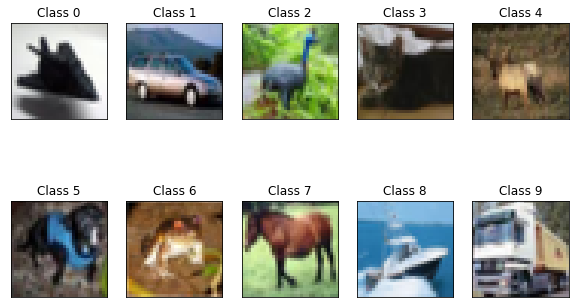

In [ ]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1]
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from keras.constraints import maxnorm

In [ ]:
final = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    keras.layers.Dropout(0.15),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    keras.layers.Dropout(0.15),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    keras.layers.Dropout(0.15),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    Flatten(), 
    keras.layers.Dropout(0.15),
    keras.layers.Dense(1024, activation='relu', kernel_constraint=maxnorm(3)),  
    keras.layers.Dropout(0.3), 
    keras.layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)), 
    keras.layers.Dropout(0.3), 
    keras.layers.Dense(10, activation='softmax')
])

final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
final.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_final_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
hist = final.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6143 - accuracy: 0.4031 - val_loss: 1.2596 - val_accuracy: 0.5378
Epoch 2/500
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1603 - accuracy: 0.5852 - val_loss: 1.0297 - val_accuracy: 0.6391
Epoch 3/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9928 - accuracy: 0.6499 - val_loss: 0.8898 - val_accuracy: 0.6899
Epoch 4/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8949 - accuracy: 0.6863 - val_loss: 0.8626 - val_accuracy: 0.6997
Epoch 5/500
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8284 - accuracy: 0.7106 - val_loss: 0.8093 - val_accuracy: 0.7233
Epoch 6/500
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7760 - accuracy: 0.7288 - val_loss: 0.7442 - val_accuracy: 0.7443
Epoch 7/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7335 - accuracy: 0.7432 - val_loss: 0.7677 -

In [ ]:
final.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.7984


[0.6914215087890625, 0.7983999848365784]

In [ ]:
score1=final.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.7984


In [ ]:
epoch = 104
hist = final.fit(X_train, y_train, 
         epochs = epoch, 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/104
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3710 - accuracy: 0.8797 - val_loss: 0.6488 - val_accuracy: 0.8080
Epoch 2/104
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3690 - accuracy: 0.8804 - val_loss: 0.6848 - val_accuracy: 0.8016
Epoch 3/104
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3680 - accuracy: 0.8806 - val_loss: 0.6844 - val_accuracy: 0.7981
Epoch 4/104
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3709 - accuracy: 0.8817 - val_loss: 0.7164 - val_accuracy: 0.7991
Epoch 5/104
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3851 - accuracy: 0.8783 - val_loss: 0.6534 - val_accuracy: 0.8090
Epoch 6/104
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3717 - accuracy: 0.8784 - val_loss: 0.6976 - val_accuracy: 0.7956
Epoch 7/104
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3735 - accuracy: 0.8807 - val_loss: 0.7372 -

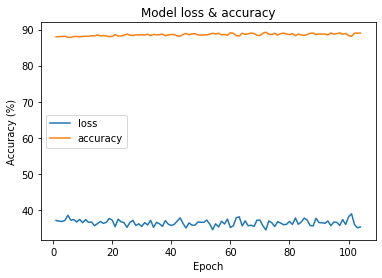

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = epoch
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [ ]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

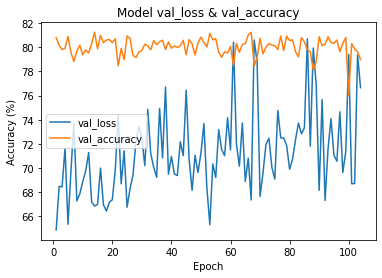

In [ ]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

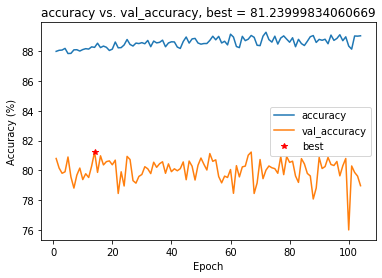

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.title('accuracy vs. val_accuracy, best = ' +str(vacc_list[np.argmax(np.array(vacc_list))]))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best']) #, loc='center bottom')


In [ ]:
# c2f2.save('fmnist_cnn_best.hdf5')

In [ ]:
from keras.models import load_model

model = load_model('cifar10_final_weights.079-0.8062.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.6432 - accuracy: 0.8062


[0.643230140209198, 0.8062000274658203]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [ ]:
cm = confusion_matrix(y_test0, predictions0)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

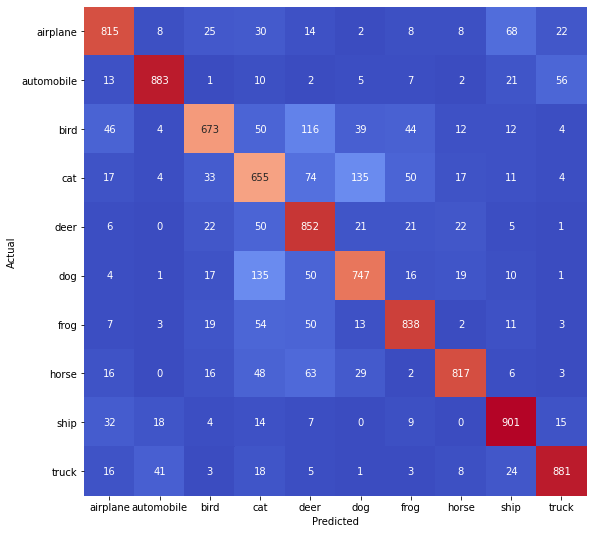

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()